# Image Quilting

## Matthew Hallac & Saurav Shroff

In [347]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [348]:
import os
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
from PIL import Image 

In [349]:
# load images here
TEXTURE_1 = imread("text_small.jpg") / 255.
TEXTURE_2 = imread("bricks_small.jpg") / 255.
TEXTURE_3 = None

### Part 1: Randomly Sampled Texture

In [350]:
def quilt_random(sample, outsize, patchsize):
    assert len(outsize) == len(sample.shape)
    
    # init an empty output image and compute how many tiles we will need in each axis
    out = np.zeros(outsize)
    y_tiles = int(outsize[0] / patchsize)
    x_tiles = int(outsize[1] / patchsize)
    
    # define a list of positions we want to "tile" in our output image
    tile_positions = []
    for y in range(y_tiles):
        for x in range(x_tiles):
            tile_positions.append((y*patchsize, x*patchsize))
            
    # for each position we want to tile, randomly choose and copy a tile from SAMPLE
    for y, x in tile_positions:
        ry = randint(0, sample.shape[0] - patchsize)
        rx = randint(0, sample.shape[1] - patchsize)
        out[y:y+patchsize, x:x+patchsize, :] = sample[ry:ry+patchsize, rx:rx+patchsize, :]

    return out
        
        

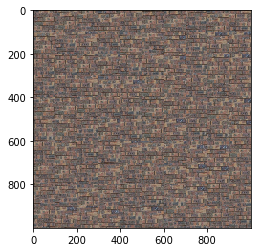

In [351]:
imshow(quilt_random(TEXTURE_2, (1000,1000, 3), 100))
# imshow(TEXTURE_1)

### Part 2: Overlapping Patches

In [370]:
# Helper functions 
def ssd(im1, im2):
    return np.sum(np.square(im1 - im2))

def choose_patch(current_patch, patches, tol):
    mask = (current_patch > 0).astype(int)
    current_patch = current_patch
    patch_scores = []
    for patch in patches:
        patch_eval = np.multiply(mask, patch)
        s = ssd(patch_eval, current_patch)
        patch_scores.append((s, patch))
    patch_scores.sort(key = lambda x: x[0])
    return patch_scores[randint(0, 100)][1]    

In [376]:
def quilt_simple(sample, outsize, patchsize, overlap, tol):
    assert len(outsize) == len(sample.shape)
    
    # init an empty output image and compute how many tiles we will need in each axis
    out = np.zeros(outsize).astype(float)
    y_tiles = 1 + int((outsize[0] - patchsize) / (patchsize - overlap))
    x_tiles = 1 + int((outsize[1] - patchsize) / (patchsize - overlap))
    
    # place the top left tile (choosing randomly)
    ry = randint(0, sample.shape[0] - patchsize)
    rx = randint(0, sample.shape[1] - patchsize)
    out[0:patchsize, 0:patchsize, :] = sample[ry:ry+patchsize, rx:rx+patchsize, :]
    
    # define a list of positions we want to "tile" in our output image
    tile_positions = []
    for y in range(y_tiles):
        for x in range(x_tiles):
            tile_positions.append((y*(patchsize - overlap) ,  x*(patchsize - overlap))) 
    
    patches = []
    for y in range(0, sample.shape[0] - patchsize):
        for x in range(0, sample.shape[1] - patchsize):
            patches.append(sample[y:y+patchsize, x:x+patchsize, :])
            
            
    # for each position we want to tile, choose and copy a tile from SAMPLE
    for y, x in tile_positions:
        if y == 0 and x == 0: continue
        current_patch = out[y:y+patchsize, x:x+patchsize, :]
        chosen_patch = choose_patch(current_patch, patches, tol)
        out[y:y+patchsize, x:x+patchsize, :] = chosen_patch
    
    return out

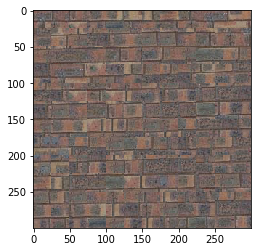

In [377]:
im = quilt_simple(TEXTURE_2, (300, 300, 3), 50, 25, 0.1)
imshow(im)

### Part 3 